In [1]:
#library importing
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import datetime as dt

In [2]:
#the list of stocks in the portfolio
list_of_stocks = ["MSFT"]
#market index
index_of_market = ["^GSPC"]
risk_free = 0.0025
days = 252

In [3]:
total_assets = list_of_stocks + index_of_market
total_assets

['MSFT', '^GSPC']

In [4]:
# function for collecting the data
def datacollecter(*tickers):
    end = dt.date(2021,3,22)
    start = dt.date(end.year-5,end.month,end.day)
    main_data = pd.DataFrame()
    assets = [*tickers]
    for a in assets:
        main_data[a] = wb.DataReader(a, data_source = 'yahoo', start = start, end = end)['Adj Close']
    return main_data

In [5]:
market_index = datacollecter(index_of_market)
market_index.head()

,^GSPC
Date,
2016-03-22,2049.800049
2016-03-23,2036.709961
2016-03-24,2035.939941
2016-03-28,2037.050049
2016-03-29,2055.010010


In [6]:
stocks = datacollecter(list_of_stocks)
stocks.head()

,MSFT
Date,
2016-03-22,49.466438
2016-03-23,49.374954
2016-03-24,49.594524
2016-03-28,48.981564
2016-03-29,50.051949


In [7]:
#merging 2 data
stocks["Market"] = market_index
stocks.head()

,MSFT,Market
Date,,
2016-03-22,49.466438,2049.800049
2016-03-23,49.374954,2036.709961
2016-03-24,49.594524,2035.939941
2016-03-28,48.981564,2037.050049
2016-03-29,50.051949,2055.010010


<AxesSubplot:xlabel='Date'>

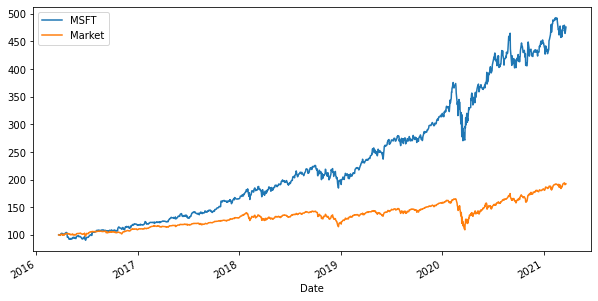

In [8]:
(stocks / stocks.iloc[0] * 100).plot(figsize=(10, 5))

In [9]:
def logreturns(*tickers):
    log_returns = pd.DataFrame()
    assets = [*tickers]
    for a in assets:
        log_returns[a]=np.log(stocks / stocks.shift(1))
        return log_returns

In [10]:
# log returns of the assets
log_returns = logreturns(total_assets)
log_returns.head()

,MSFT,^GSPC
Date,,
2016-03-22,NaN,NaN
2016-03-23,-0.001851,-0.006407
2016-03-24,0.004437,-0.000378
2016-03-28,-0.012436,0.000545
2016-03-29,0.021617,0.008778


In [11]:
#covariance of the assets with the market and with one another
covariance = log_returns.cov()
covariance

,MSFT,^GSPC
MSFT,0.000302,0.000174
^GSPC,0.000174,0.000147


In [12]:
#covariance of the assets with the market
cov_with_market = covariance.iloc[:,-1:]
cov_with_market

,^GSPC
MSFT,0.000174
^GSPC,0.000147


In [13]:
# beta of the assets
beta = cov_with_market/cov_with_market.iloc[-1]
beta

,^GSPC
MSFT,1.190061
^GSPC,1.000000


In [14]:
#calculating market return based on the past historical log returns
market_return = np.log(market_index/market_index.shift(1)).mean()*days
market_return

^GSPC    0.130925
dtype: float64

In [15]:
#Calculating CAPM
required_return = risk_free + beta*(market_return - risk_free)
required_return

,^GSPC
MSFT,0.155334
^GSPC,0.130925
